In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
final_data = pd.read_csv('../data/teis_final_data.csv')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115524 entries, 0 to 115523
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Child ID                   115524 non-null  int64  
 1   Notification Date          115524 non-null  object 
 2   Fiscal Year                113256 non-null  object 
 3   Notification Month         113256 non-null  object 
 4   Tenn Region                113256 non-null  object 
 5   Fiscal Year.1              113256 non-null  float64
 6   third_DOB                  113256 non-null  object 
 7   Late Referral              2829 non-null    float64
 8   Qtr                        113256 non-null  float64
 9   POE                        115524 non-null  object 
 10  DOB                        115524 non-null  object 
 11  County Name                115520 non-null  object 
 12  County SES                 115520 non-null  object 
 13  Child Phase                11

In [3]:
monthly_df = pd.read_excel('../data/TEIS Compiled Monthly.xlsx')
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113256 entries, 0 to 113255
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   POE                          113256 non-null  object        
 1   Child ID                     113256 non-null  int64         
 2   DOB                          113256 non-null  datetime64[ns]
 3   County Name                  113251 non-null  object        
 4   County SES                   113251 non-null  object        
 5   Child Phase                  113256 non-null  object        
 6   Active                       113256 non-null  object        
 7   Service Coordinator          113255 non-null  object        
 8   Notification/ Referral Date  113256 non-null  datetime64[ns]
 9   Parent Consent Date          58101 non-null   datetime64[ns]
 10  Referral Source Type Name    113256 non-null  object        
 11  Initial Eligibility       

In [4]:
referral_df = pd.read_excel('../data/TEIS Referral Data.xlsx')

In [5]:
referral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96580 entries, 0 to 96579
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   POE                        96580 non-null  object        
 1   Child ID                   96580 non-null  int64         
 2   DOB                        96580 non-null  datetime64[ns]
 3   County Name                96576 non-null  object        
 4   County SES                 96576 non-null  object        
 5   Child Phase                96580 non-null  object        
 6   Active                     96580 non-null  object        
 7   Service Coordinator        96579 non-null  object        
 8   Notification Date          96580 non-null  datetime64[ns]
 9   Parent Consent Date        70026 non-null  datetime64[ns]
 10  Referral Source Type Name  96580 non-null  object        
 11  Initial Eligibility        68221 non-null  object        
 12  Init

### Merge DataFrames

In [6]:
monthly_df = monthly_df.rename(columns = {'Notification/ Referral Date': 'Notification Date'})
referral_df = referral_df.rename(columns = {'County SES ': 'County SES'})

In [7]:
for ind, row in monthly_df.iterrows():
    if re.search('\d{5}', str(row['Exit Date'])):
        monthly_df.loc[ind, 'Exit Date'] = np.NaN
    if re.search('\d{5}', str(row['Latest IFSP Date'])):
        monthly_df.loc[ind, 'Latest IFSP Date'] = np.NaN
    if re.search('\d{5}', str(row['Initial IFSP Date'])):
        monthly_df.loc[ind, 'Initial IFSP Date'] = np.NaN
    if re.search('\d{5}', str(row['Initial Eligibility Date'])):
        monthly_df.loc[ind, 'Initial Eligibility Date'] = np.NaN

In [8]:
monthly_df["Exit Date"] = pd.to_datetime(monthly_df["Exit Date"])
monthly_df['Latest IFSP Date'] = pd.to_datetime(monthly_df['Latest IFSP Date'])
monthly_df['Initial IFSP Date'] = pd.to_datetime(monthly_df['Initial IFSP Date'])
monthly_df['Initial Eligibility Date'] = pd.to_datetime(monthly_df['Initial Eligibility Date'])

In [9]:
merge = pd.merge(monthly_df, referral_df, how = 'outer')
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184750 entries, 0 to 184749
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   POE                          184750 non-null  object        
 1   Child ID                     184750 non-null  int64         
 2   DOB                          184750 non-null  datetime64[ns]
 3   County Name                  184742 non-null  object        
 4   County SES                   184742 non-null  object        
 5   Child Phase                  184750 non-null  object        
 6   Active                       184750 non-null  object        
 7   Service Coordinator          184749 non-null  object        
 8   Notification Date            184750 non-null  datetime64[ns]
 9   Parent Consent Date          120196 non-null  datetime64[ns]
 10  Referral Source Type Name    184750 non-null  object        
 11  Initial Eligibility       

In [10]:
full_teis = pd.concat([monthly_df, referral_df])

In [11]:
teis_clean = full_teis[~full_teis.duplicated(['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'])]
teis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184750 entries, 0 to 96579
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   POE                          184750 non-null  object        
 1   Child ID                     184750 non-null  int64         
 2   DOB                          184750 non-null  datetime64[ns]
 3   County Name                  184742 non-null  object        
 4   County SES                   184742 non-null  object        
 5   Child Phase                  184750 non-null  object        
 6   Active                       184750 non-null  object        
 7   Service Coordinator          184749 non-null  object        
 8   Notification Date            184750 non-null  datetime64[ns]
 9   Parent Consent Date          120196 non-null  datetime64[ns]
 10  Referral Source Type Name    184750 non-null  object        
 11  Initial Eligibility        

In [12]:
teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_clean

C:\Users\sethm\anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1.0,2016.0,1.0,NaN,NaN,2017-08-09,NaN,1.0,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1.0,2016.0,1.0,NaN,NaN,2016-07-31,1.0,1.0,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1.0,2016.0,1.0,NaN,NaN,2019-02-05,NaN,1.0,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1.0,2016.0,1.0,NaN,NaN,2018-12-06,NaN,1.0,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1.0,2016.0,1.0,NaN,NaN,2018-04-18,NaN,1.0,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96572,UC,523485,2019-10-23,Sumner,Competitive,IFSP,A,Miriam Espinosa,2022-03-02,2022-03-10,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96573,UC,528430,2022-01-05,Cumberland,Transitional,IFSP,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96574,UC,515685,2019-08-14,Sumner,Competitive,IFSP,A,Cindy Willard,2021-12-01,2021-12-07,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [13]:
teis_clean = teis_clean.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count',
                                        'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                       'Referral Source Category'])
teis_clean.head(2)

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaT,NaN,NaT,2016-2017,Jul,Eastern,2016.0,2017-08-09,NaN,1.0
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaT,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016.0,2016-07-31,1.0,1.0


In [14]:
all_teis_dups = teis_clean[teis_clean.duplicated(['Child ID', 'Notification Date'], keep=False)].sort_values('Child ID')
all_teis_dups

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
8367,NW,351755,2013-11-13,Madison,Transitional,Eligibility,I,Rene Bard,2016-07-12,2016-07-12,...,NaT,Ineligible for Part C,2016-08-25,NaN,NaN,NaN,NaN,NaT,NaN,NaN
437,NW,351755,2013-11-13,Madison,Transitional,Evaluation,A,Rene Bard,2016-07-12,2016-07-12,...,NaT,NaN,NaT,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0
1552,UC,353805,2013-12-04,Putnam,Transitional,Evaluation,A,Anna Bolin,2016-08-05,2016-08-15,...,NaT,NaN,NaT,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0
13240,UC,353805,2013-12-04,Putnam,Transitional,IFSP,I,Anna Bolin,2016-08-05,2016-08-15,...,NaT,618 - Part B eligibility not determined,2016-12-03,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4142,MD,353900,2013-10-09,Shelby,Transitional,Notification,I,JoAnn Hinkle-DA,2016-09-29,NaT,...,NaT,Referral less than 45 days,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113190,UC,529587,2022-03-15,Sumner,Competitive,Evaluation,A,Kim Correll,2022-05-31,2022-06-08,...,NaT,NaN,NaT,2021-2022,May,Middle,2021.0,2025-03-15,NaN,4.0
93343,SE,529597,2020-04-10,McMinn,Transitional,Eligibility,I,Jennifer Rose - ES,2022-05-31,2022-06-04,...,NaT,Ineligible for Part C,2022-06-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
112947,SE,529597,2020-04-10,McMinn,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,NaT,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-04-10,NaN,4.0
111777,FT,529609,2020-05-13,Washington,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,NaT,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-05-13,NaN,4.0


In [15]:
monthly_df2 = monthly_df.drop(columns = ['POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active', 'Service Coordinator', 
                                 'Parent Consent Date', 'Referral Source Type Name', 'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP Date', 'Exit Reason', 'Exit Date',
                                 '2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
monthly_df2

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,403339,2016-07-01,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,404085,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,403623,2016-07-01,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,404157,2016-07-01,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,404154,2016-07-01,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...
113251,528759,2022-05-16,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,528534,2022-05-11,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,528430,2022-05-10,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,528253,2022-05-06,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [16]:
merged = pd.merge(monthly_df2, referral_df, how = 'outer').sort_values(['Child ID'])
merged

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr,POE,...,Active,Service Coordinator,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
25415,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,I,NaN,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2010-01-25
2092,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,I,Steven Scarlett,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2016-08-31
437,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,I,Rene Bard,2016-07-12,Parent,Ineligible,2016-08-25,NaT,NaT,Ineligible for Part C,2016-08-25
3369,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,I,Jennifer Terranera - 45 days,NaT,Parent,NaN,NaT,NaT,NaT,Referral less than 45 days,2016-09-15
1552,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,I,Anna Bolin,2016-08-15,Dept. of Health,Eligible,2016-10-05,2016-10-10,NaT,618 - Part B eligibility not determined,2016-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114109,531592,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,PCP,NaN,NaT,NaT,NaT,NaN,NaT
114352,531593,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,PCP,NaN,NaT,NaT,NaT,NaN,NaT
114075,531594,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,Other Health Care Provider,NaN,NaT,NaT,NaT,NaN,NaT
114046,531595,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,Hospital,NaN,NaT,NaT,NaT,NaN,NaT


In [17]:
merged[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = merged[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 25415 to 114959
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        96580 non-null   object        
 10  DOB                        96580 non-null   datetime64[ns]
 11  County Name                96576 non-null   obje

In [18]:
teis_c3 = monthly_df.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaT,NaN,NaT,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaT,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaT,NaN,NaT,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,2016-08-10,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,2016-07-28,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,NaT,NaN,NaT,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,2022-06-14,NaN,NaT,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,NaT,NaN,NaT,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,2022-05-31,NaN,NaT,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [19]:
teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaT,NaN,NaT,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaT,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaT,NaN,NaT,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,2016-08-10,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,2016-07-28,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,NaT,NaN,NaT,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,2022-06-14,NaN,NaT,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,NaT,NaN,NaT,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,2022-05-31,NaN,NaT,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [20]:
teis_merge2 = pd.merge(merged, teis_c3, on=['Child ID', 'Notification Date'], how='left')
teis_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        96580 non-null   object        
 10  DOB_x                        96580 non-null   datetime64[ns]
 11  County Name_x             

In [21]:
teis_merge2['Referral Source Type Name_x'] = teis_merge2['Referral Source Type Name_x'].fillna(teis_merge2['Referral Source Type Name_y'])
teis_merge2['Late Referral_x'] = teis_merge2['Late Referral_x'].fillna(teis_merge2['Late Referral_y'])
teis_merge2['Qtr_x'] = teis_merge2['Qtr_x'].fillna(teis_merge2['Qtr_y'])
teis_merge2['POE_x'] = teis_merge2['POE_x'].fillna(teis_merge2['POE_y'])
teis_merge2['DOB_x'] = teis_merge2['DOB_x'].fillna(teis_merge2['DOB_y'])
teis_merge2['County Name_x'] = teis_merge2['County Name_x'].fillna(teis_merge2['County Name_y'])
teis_merge2['County SES_x'] = teis_merge2['County SES_x'].fillna(teis_merge2['County SES_y'])
teis_merge2['Child Phase_x'] = teis_merge2['Child Phase_x'].fillna(teis_merge2['Child Phase_y'])
teis_merge2['Service Coordinator_x'] = teis_merge2['Service Coordinator_x'].fillna(teis_merge2['Service Coordinator_y'])
teis_merge2['Parent Consent Date_x'] = teis_merge2['Parent Consent Date_x'].fillna(teis_merge2['Parent Consent Date_y'])
teis_merge2['Initial Eligibility_x'] = teis_merge2['Initial Eligibility_x'].fillna(teis_merge2['Initial Eligibility_y'])
teis_merge2['Initial Eligibility Date_x'] = teis_merge2['Initial Eligibility Date_x'].fillna(teis_merge2['Initial Eligibility Date_y'])
teis_merge2['Initial IFSP Date_x'] = teis_merge2['Initial IFSP Date_x'].fillna(teis_merge2['Initial IFSP Date_y'])
teis_merge2['Latest IFSP Date_x'] = teis_merge2['Latest IFSP Date_x'].fillna(teis_merge2['Latest IFSP Date_y'])
teis_merge2['Exit Reason_x'] = teis_merge2['Exit Reason_x'].fillna(teis_merge2['Exit Reason_y'])
teis_merge2['Exit Date_x'] = teis_merge2['Exit Date_x'].fillna(teis_merge2['Exit Date_x'])
teis_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        115524 non-null  object        
 10  DOB_x                        115524 non-null  datetime64[ns]
 11  County Name_x             

In [22]:
teis_merge2 = teis_merge2.drop(columns = ['POE_y', 'DOB_y', 'County Name_y', 'County SES_y', 'Child Phase_y', 'Active_y',
                                          'Service Coordinator_y', 'Parent Consent Date_y', 'Referral Source Type Name_y', 
                                          'Initial Eligibility_y', 'Initial Eligibility Date_y', 'Initial IFSP Date_y',
                                          'Latest IFSP Date_y', 'Exit Reason_y', 'Exit Date_y', 'Fiscal Year_y',
                                          'Notification Month_y', 'Tenn Region_y', 'Fiscal Year.1_y', 'third DOB_y', 
                                          'Late Referral_y', 'Qtr_y'])

In [23]:
teis_merge2 = teis_merge2.rename(columns= {'Fiscal Year_x': 'Fiscal Year',
                                           'Notification Month_x' : 'Notification Month', 
                                           'Tenn Region_x' : 'Tenn Region', 
                                           'Fiscal Year.1_x' : 'Fiscal Year.1',
                                           'third DOB_x' : 'third_DOB',
                                           'Late Referral_x' : 'Late Referral',
                                           'Qtr_x' : 'Qtr',
                                           'POE_x' : 'POE',
                                           'DOB_x' : 'DOB',
                                           'County Name_x' : 'County Name',
                                           'County SES_x' : 'County SES',
                                           'Child Phase_x' : 'Child Phase',
                                           'Active_x' : 'Active',
                                           'Service Coordinator_x' : 'Service Coordinator',
                                           'Parent Consent Date_x' : 'Parent Consent',
                                           'Referral Source Type Name_x' : 'Referral Source Type Name',
                                           'Initial Eligibility_x' : 'Initial Eligibility',
                                           'Initial Eligibility Date_x' : 'Initial Eligibility Date',
                                           'Initial IFSP Date_x' : 'Initial IFSP Date',
                                           'Latest IFSP Date_x' : 'Latest IFSP',
                                           'Exit Reason_x' : 'Exit Reason',
                                           'Exit Date_x' : 'Exit Date'})
teis_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third_DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        115524 non-null  object        
 10  DOB                        115524 non-null  datetime64[ns]
 11  County Name                115520 non-null  object  

In [24]:
teis_merge2['Year'] = teis_merge2['Notification Date'].dt.year
teis_merge2.head(2)

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2010-01-25,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2016-08-31,2016


In [25]:
all_dups2 = teis_merge2[teis_merge2.duplicated(['Child ID', 'Notification Date'], keep=False)].sort_values('Child ID')
all_dups2
#making sure that there aren't any unanticipated duplicates

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year


### Add Age Column

In [26]:
teis_merge2['Age'] = (teis_merge2['Notification Date'] - teis_merge2['DOB']).dt.days / 365
teis_merge2['Age (Months)'] = (teis_merge2['Notification Date'] - teis_merge2['DOB']).dt.days/ 12
teis_merge2

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Age,Age (Months)
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,DCS,NaN,NaT,NaT,NaT,Unable to contact,2010-01-25,2018,10.547945,320.833333
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,PCP,NaN,NaT,NaT,NaT,Unable to contact,2016-08-31,2016,2.841096,86.416667
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Parent,Ineligible,2016-08-25,NaT,NaT,Ineligible for Part C,2016-08-25,2016,2.663014,81.000000
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Parent,NaN,NaT,NaT,NaT,Referral less than 45 days,2016-09-15,2016,2.956164,89.916667
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Dept. of Health,Eligible,2016-10-05,2016-10-10,NaT,618 - Part B eligibility not determined,2016-12-03,2016,2.671233,81.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,PCP,NaN,NaT,NaT,NaT,NaN,NaT,2022,2.115068,64.333333
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,PCP,NaN,NaT,NaT,NaT,NaN,NaT,2022,0.564384,17.166667
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,Other Health Care Provider,NaN,NaT,NaT,NaT,NaN,NaT,2022,0.027397,0.833333
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,Hospital,NaN,NaT,NaT,NaT,NaN,NaT,2022,0.038356,1.166667


## Masking

In [27]:
monthly_et = monthly_df.loc[monthly_df['POE'] == 'ET']
monthly_ft = monthly_df.loc[monthly_df['POE'] == 'FT']
monthly_gn = monthly_df.loc[monthly_df['POE'] == 'GN']
monthly_md = monthly_df.loc[monthly_df['POE'] == 'MD']
monthly_nw = monthly_df.loc[monthly_df['POE'] == 'NW']
monthly_sc = monthly_df.loc[monthly_df['POE'] == 'SC']
monthly_se = monthly_df.loc[monthly_df['POE'] == 'SE']
monthly_sw = monthly_df.loc[monthly_df['POE'] == 'SW']
monthly_uc = monthly_df.loc[monthly_df['POE'] == 'UC']

In [28]:
referral_et = referral_df.loc[referral_df['POE'] == 'ET']
referral_ft = referral_df.loc[referral_df['POE'] == 'FT']
referral_gn = referral_df.loc[referral_df['POE'] == 'GN']
referral_md = referral_df.loc[referral_df['POE'] == 'MD']
referral_nw = referral_df.loc[referral_df['POE'] == 'NW']
referral_sc = referral_df.loc[referral_df['POE'] == 'SC']
referral_se = referral_df.loc[referral_df['POE'] == 'SE']
referral_sw = referral_df.loc[referral_df['POE'] == 'SW']
referral_uc = referral_df.loc[referral_df['POE'] == 'UC']

In [29]:
#monthly_et['Age'] = (monthly_et['Notification/ Referral Date'] - monthly_et['DOB']).dt.days

In [30]:
active = referral_df[referral_df['Active'] == 'A']
active

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
44490,ET,473470,2019-10-17,Blount,Transitional,IFSP,A,Tiffany Robbins,2019-11-18,2019-12-12,DCS,Eligible,2019-12-17,2020-01-10,2022-06-06,NaN,NaT
44492,ET,471077,2019-09-01,Blount,Transitional,IFSP,A,Tiffany Robbins,2019-11-18,2019-11-18,Parent,Eligible,2019-10-25,2019-12-12,2022-06-06,NaN,NaT
44497,ET,471127,2019-07-07,Knox,Transitional,IFSP,A,Jackie Campbell,2019-10-08,2019-10-15,Other,Eligible,2019-10-16,2019-11-14,2022-06-01,NaN,NaT
44566,ET,473709,2019-11-01,Grainger,At-Risk,IFSP,A,Elizabeth Mounts,2019-11-21,2019-11-26,DCS,Eligible,2019-12-09,2019-12-23,2022-05-20,NaN,NaT
44630,ET,473817,2019-07-30,Knox,Transitional,IFSP,A,Sandi Foust,2019-11-22,2019-12-02,Parent,Eligible,2019-12-05,2019-12-18,2022-05-13,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96572,UC,523485,2019-10-23,Sumner,Competitive,IFSP,A,Miriam Espinosa,2022-03-02,2022-03-10,PCP,Eligible,2022-05-11,2022-05-18,2022-06-08,NaN,NaT
96573,UC,528430,2022-01-05,Cumberland,Transitional,IFSP,A,Lisa Davis,2022-05-10,2022-05-18,Parent,Eligible,2022-06-07,2022-06-21,2022-06-21,NaN,NaT
96574,UC,515685,2019-08-14,Sumner,Competitive,IFSP,A,Cindy Willard,2021-12-01,2021-12-07,Parent,Eligible,2022-01-20,2022-01-26,2022-06-21,NaN,NaT
96576,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,PCP,Eligible,2022-05-23,2022-05-31,2022-05-31,NaN,NaT


# What is the rate of re-referral?

In [31]:
# Duplicated Child IDs
reref = (monthly_df['Child ID'].value_counts() > 1).sum()
reref

15267

In [32]:
# Sum of total Child IDs
num_children = pd.concat([monthly_df['Child ID'], referral_df['Child ID']], axis = 0).nunique()
num_children

96743

In [33]:
# Divide Duplicated Child IDs by Sum of total Child IDs
perc_reref = str(round(((reref / num_children) * 100), 2)) + '%'
perc_reref

'15.78%'

#### Rate of re-referral for East Tennessee

In [34]:
# Duplicated Child IDs
east_reref = (monthly_et['Child ID'].value_counts() > 1).sum()
east_reref

2770

In [35]:
# Sum of total Child IDs
east_num_children = pd.concat([monthly_et['Child ID'], referral_et['Child ID']], axis = 0).nunique()
east_num_children

17414

In [36]:
# Divide Duplicated Child IDs by Sum of total Child IDs
et_reref = str(round(((east_reref / east_num_children) * 100), 2)) + '%'
et_reref

'15.91%'

#### Rate of referral for First Tennessee

In [37]:
ft_reref = (monthly_ft['Child ID'].value_counts() > 1).sum()

In [38]:
ft_num_children = pd.concat([monthly_ft['Child ID'], referral_ft['Child ID']], axis = 0).nunique()

In [39]:
ft_reref_perc = str(round(((ft_reref / ft_num_children) * 100), 2)) + '%'
ft_reref_perc

'15.46%'

#### Rate of re-referral for Greater Nashville

In [40]:
gn_reref = (monthly_gn['Child ID'].value_counts() > 1).sum()

In [41]:
gn_num_children = pd.concat([monthly_gn['Child ID'], referral_gn['Child ID']], axis = 0).nunique()

In [42]:
gn_reref_perc = str(round(((gn_reref / gn_num_children) * 100), 2)) + '%'
gn_reref_perc

'15.36%'

#### Rate of referral for Memphis Delta

In [43]:
md_reref = (monthly_md['Child ID'].value_counts() > 1).sum()

In [44]:
md_num_children = pd.concat([monthly_md['Child ID'], referral_md['Child ID']], axis = 0).nunique()

In [45]:
md_reref_perc = str(round(((md_reref / md_num_children) * 100), 2)) + '%'
md_reref_perc

'17.25%'

#### Rate of re-referral for Northwest

In [46]:
nw_reref = (monthly_nw['Child ID'].value_counts() > 1).sum()

In [47]:
nw_num_children = pd.concat([monthly_nw['Child ID'], referral_nw['Child ID']], axis = 0).nunique()

In [48]:
nw_reref_perc = str(round(((nw_reref / nw_num_children) * 100), 2)) + '%'
nw_reref_perc

'15.21%'

#### Rate of re-referral for South Central

In [49]:
sc_reref = (monthly_sc['Child ID'].value_counts() > 1).sum()

In [50]:
sc_num_children = pd.concat([monthly_sc['Child ID'], referral_sc['Child ID']], axis = 0).nunique()

In [51]:
sc_reref_perc = str(round(((sc_reref / sc_num_children) * 100), 2)) + '%'
sc_reref_perc

'13.31%'

#### Rate of re-referral for Southeast

In [52]:
se_reref = (monthly_se['Child ID'].value_counts() > 1).sum()

In [53]:
se_num_children = pd.concat([monthly_se['Child ID'], referral_se['Child ID']], axis = 0).nunique()

In [54]:
se_reref_perc = str(round(((se_reref / se_num_children) * 100), 2)) + '%'
se_reref_perc

'11.79%'

#### Rate of re-referral for Southwest

In [55]:
sw_reref = (monthly_sw['Child ID'].value_counts() > 1).sum()

In [56]:
sw_num_children = pd.concat([monthly_sw['Child ID'], referral_sw['Child ID']], axis = 0).nunique()

In [57]:
sw_reref_perc = str(round(((sw_reref / sw_num_children) * 100), 2)) + '%'
sw_reref_perc

'14.01%'

#### Rate of re-referral for Upper Cumberland

In [58]:
uc_reref = (monthly_uc['Child ID'].value_counts() > 1).sum()

In [59]:
uc_num_children = pd.concat([monthly_uc['Child ID'], referral_uc['Child ID']], axis = 0).nunique()

In [60]:
uc_reref_perc = str(round(((uc_reref / uc_num_children) * 100), 2)) + '%'
uc_reref_perc

'12.89%'

### All POE re-referral rates

In [61]:
print('Total re-referral rate: ' + perc_reref)
print('East Tennessee re-referral rate: ' + et_reref)
print('First Tennessee re-referral rate: ' + ft_reref_perc)
print('Greater Nashville re-referral rate: ' + gn_reref_perc)
print('Memphis Delta re-referral rate: ' + md_reref_perc)
print('Northwest re-referral rate: ' + nw_reref_perc)
print('South Central re-referral rate: ' + sc_reref_perc)
print('Southeast re-referral rate: ' + se_reref_perc)
print('Southwest re-referral rate: ' + sw_reref_perc)
print('Upper Cumberland re-referral rate: ' + uc_reref_perc)

Total re-referral rate: 15.78%
East Tennessee re-referral rate: 15.91%
First Tennessee re-referral rate: 15.46%
Greater Nashville re-referral rate: 15.36%
Memphis Delta re-referral rate: 17.25%
Northwest re-referral rate: 15.21%
South Central re-referral rate: 13.31%
Southeast re-referral rate: 11.79%
Southwest re-referral rate: 14.01%
Upper Cumberland re-referral rate: 12.89%


In [62]:
teis_merge2_reref = (teis_merge2['Child ID'].value_counts() > 1).sum()
teis_merge2_reref

15641

In [63]:
teis_merge2_num_children = teis_merge2['Child ID'].nunique()
teis_merge2_num_children

96743

In [64]:
teis_merge2_perc = str(round(((teis_merge2_reref / teis_merge2_num_children) * 100), 2)) + '%'
teis_merge2_perc

'16.17%'

# Referral sources with higher rates of successful referrals

In [65]:
final_data['Success'] = (final_data['Initial IFSP Date'].notna()) | (final_data['Child Phase'] == 'IFSP')

In [66]:
final_data['Success'].mean()

0.39403067760811605

In [67]:
referral_source = final_data['Referral Source Type Name'].value_counts() 

In [68]:
success = final_data[(final_data['Initial IFSP Date'].notna()) | (final_data['Child Phase'] == 'IFSP')]
referral_success = success['Referral Source Type Name'].value_counts()

In [69]:
merged_referral_source = pd.concat([referral_success, referral_source], axis = 1, join = 'inner')
merged_referral_source.columns = ['Successful Referral Count', 'Total Referral Count']
merged_referral_source['Success Rate'] = round((merged_referral_source['Successful Referral Count'] / merged_referral_source['Total Referral Count']) * 100, 2)
merged_referral_source = merged_referral_source.reset_index()
merged_referral_source

,index,Successful Referral Count,Total Referral Count,Success Rate
0,PCP,18264,43899,41.60
1,Parent,12595,21944,57.40
2,DCS,4510,25721,17.53
3,Hospital,2916,7292,39.99
4,Dept. of Health,1375,3675,37.41
5,Other,1184,2612,45.33
6,NICU,1158,3275,35.36
7,Other Health Care Provider,1146,2326,49.27
8,Early Head Start/Head Start,423,1025,41.27
9,Speech Therapist,395,654,60.40


In [113]:
merged_referral_source = merged_referral_source.sort_values(by = 'Total Referral Count', ascending = False)
merged_referral_source = merged_referral_source.rename(columns = {'index': 'Referral Source'})
merged_referral_source

,Referral Source,Successful Referral Count,Total Referral Count,Success Rate
0,PCP,18264,43899,41.60
2,DCS,4510,25721,17.53
1,Parent,12595,21944,57.40
3,Hospital,2916,7292,39.99
4,Dept. of Health,1375,3675,37.41
6,NICU,1158,3275,35.36
5,Other,1184,2612,45.33
7,Other Health Care Provider,1146,2326,49.27
8,Early Head Start/Head Start,423,1025,41.27
9,Speech Therapist,395,654,60.40


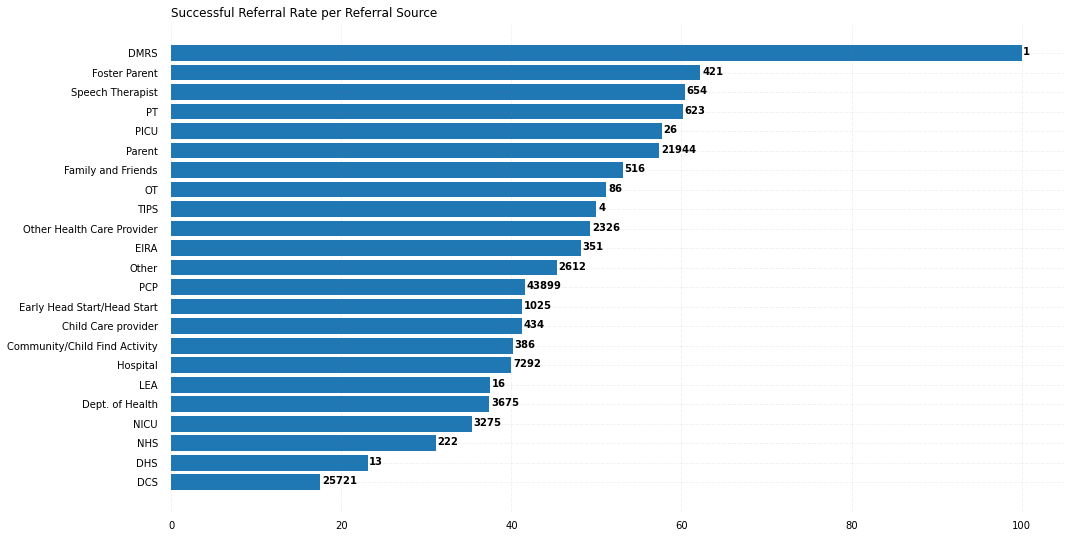

In [72]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(merged_referral_source['Referral Source'], merged_referral_source['Success Rate'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for counter, i in enumerate(ax.patches):
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             #str(round((i.get_width()), 2)),
             str(merged_referral_source['Total Referral Count'].values[counter]),
             fontsize = 10, fontweight ='bold',
             color ='black')
 
# Add Plot Title
ax.set_title('Successful Referral Rate per Referral Source',
             loc ='left', );

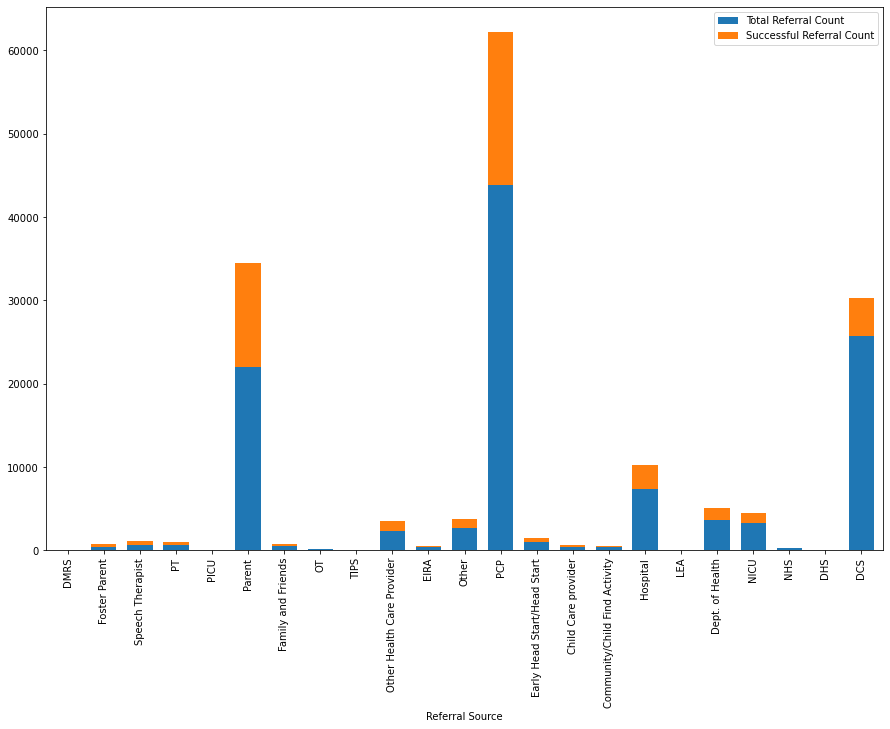

In [73]:
merged_referral_source.sort_values(by = 'Success Rate', ascending = False).plot(x='Referral Source', y = ['Total Referral Count', 'Successful Referral Count'], kind = 'bar', figsize = (15,10), stacked = True, width = .7);


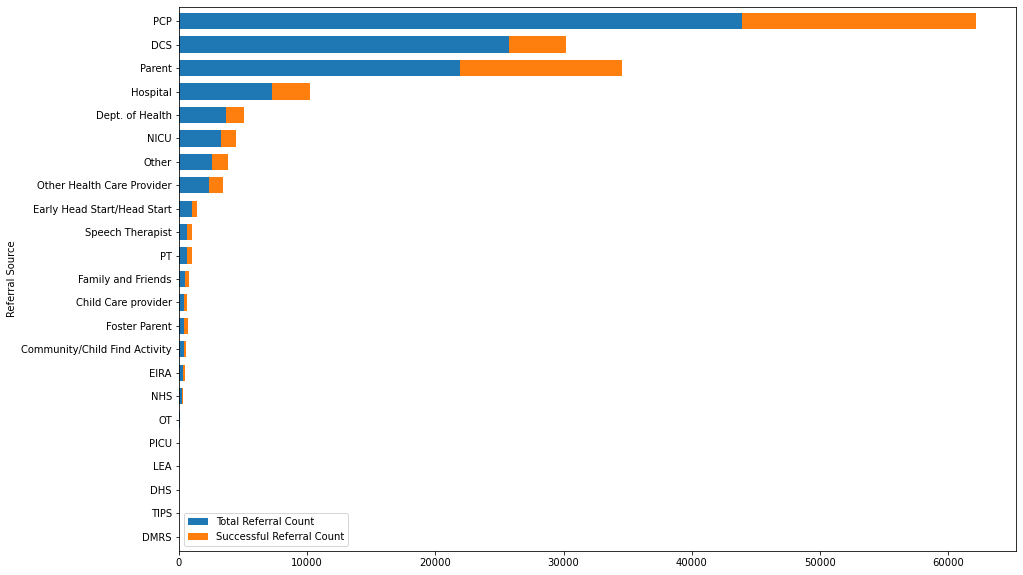

In [114]:
merged_referral_source.sort_values(by = 'Total Referral Count', ascending = True).plot(x='Referral Source',
                                                                                       y = ['Total Referral Count', 
                                                                                            'Successful Referral Count'], 
                                                                                       kind = 'barh', figsize = (15,10), 
                                                                                       stacked = True, width = .7);

## POE average age of referral

In [75]:
whos% DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
active                   DataFrame          POE  Child ID      <...>[11390 rows x 17 columns]
all_dups2                DataFrame    Empty DataFrame\nColumns:<...>\n\n[0 rows x 25 columns]
all_teis_dups            DataFrame           POE  Child ID     <...>138452 rows x 24 columns]
final_data               DataFrame            Child ID Notifica<...>115524 rows x 26 columns]
full_teis                DataFrame          POE  Child ID      <...>209836 rows x 34 columns]
merge                    DataFrame           POE  Child ID     <...>184750 rows x 34 columns]
merged                   DataFrame            Child ID Notifica<...>115524 rows x 24 columns]
merged_referral_source   DataFrame                      Referra<...>    25721         17.53  
monthly_df               DataFrame           POE  Child ID     <...>113256 rows x 34 columns]
monthly_df2              DataFrame            Child ID Not

In [76]:
referral_et.columns

Index(['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'],
      dtype='object')

In [77]:
referral_et['Age'] = (referral_et['Notification Date'] - referral_et['DOB'])

<ipython-input-77-4312dfbabd51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referral_et['Age'] = (referral_et['Notification Date'] - referral_et['DOB'])


In [78]:
et_avg_age = referral_et['Age'].mean()


In [79]:
referral_ft['Age'] = (referral_ft['Notification Date'] - referral_ft['DOB'])

<ipython-input-79-e52896922c77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referral_ft['Age'] = (referral_ft['Notification Date'] - referral_ft['DOB'])


In [80]:
ft_avg_age = referral_ft['Age'].mean()

In [81]:
referral_gn['Age'] = (referral_gn['Notification Date'] - referral_gn['DOB'])
gn_avg_age = referral_gn['Age'].mean()

<ipython-input-81-638746183903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referral_gn['Age'] = (referral_gn['Notification Date'] - referral_gn['DOB'])


In [82]:
referral_md['Age'] = (referral_md['Notification Date'] - referral_md['DOB'])
referral_nw['Age'] = (referral_nw['Notification Date'] - referral_nw['DOB'])
referral_sc['Age'] = (referral_sc['Notification Date'] - referral_sc['DOB'])
referral_se['Age'] = (referral_se['Notification Date'] - referral_se['DOB'])
referral_sw['Age'] = (referral_sw['Notification Date'] - referral_sw['DOB'])
referral_uc['Age'] = (referral_uc['Notification Date'] - referral_uc['DOB'])

<ipython-input-82-e14d29e91f39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referral_md['Age'] = (referral_md['Notification Date'] - referral_md['DOB'])
<ipython-input-82-e14d29e91f39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  referral_nw['Age'] = (referral_nw['Notification Date'] - referral_nw['DOB'])
<ipython-input-82-e14d29e91f39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [83]:
md_avg_age = referral_md['Age'].mean()
nw_avg_age = referral_nw['Age'].mean()
sc_avg_age = referral_sc['Age'].mean()
se_avg_age = referral_se['Age'].mean()
sw_avg_age = referral_sw['Age'].mean()
uc_avg_age = referral_uc['Age'].mean()

In [84]:
print('Average age for East Tennessee:' + str(et_avg_age))

Average age for East Tennessee:479 days 06:28:16.665303968


# Are ineligibility rates higher in certain areas?

#### East Tennessee

In [85]:
et_eligibility = referral_et['Initial Eligibility'].value_counts(normalize=True).to_frame()
et_eligibility = et_eligibility.rename(columns={'Initial Eligibility': 'East Tennessee'})
et_eligibility = round(et_eligibility['East Tennessee'] * 100, 1).to_frame()

#### First Tennessee

In [86]:
ft_eligibility = referral_ft['Initial Eligibility'].value_counts(normalize=True).to_frame()
ft_eligibility = ft_eligibility.rename(columns={'Initial Eligibility': 'First Tennessee'})
ft_eligibility = round(ft_eligibility['First Tennessee'] * 100, 1).to_frame()

#### Greater Nashville

In [87]:
gn_eligibility = referral_gn['Initial Eligibility'].value_counts(normalize=True).to_frame()
gn_eligibility = gn_eligibility.rename(columns={'Initial Eligibility': 'Greater Nashville'})
gn_eligibility = round(gn_eligibility['Greater Nashville'] * 100, 1).to_frame()

#### Memphis Delta

In [88]:
md_eligibility = referral_md['Initial Eligibility'].value_counts(normalize=True).to_frame()
md_eligibility = md_eligibility.rename(columns={'Initial Eligibility': 'Memphis Delta'})
md_eligibility = round(md_eligibility['Memphis Delta'] * 100, 1).to_frame()

#### Northwest

In [89]:
nw_eligibility = referral_nw['Initial Eligibility'].value_counts(normalize=True).to_frame()
nw_eligibility = nw_eligibility.rename(columns={'Initial Eligibility': 'Northwest'})
nw_eligibility = round(nw_eligibility['Northwest'] * 100, 1).to_frame() 

#### South Central

In [90]:
sc_eligibility = referral_sc['Initial Eligibility'].value_counts(normalize=True).to_frame()
sc_eligibility = sc_eligibility.rename(columns={'Initial Eligibility': 'South Central'})
sc_eligibility = round(sc_eligibility['South Central'] * 100, 1).to_frame() 

#### Southeast

In [91]:
se_eligibility = referral_se['Initial Eligibility'].value_counts(normalize=True).to_frame()
se_eligibility = se_eligibility.rename(columns={'Initial Eligibility': 'Southeast'})
se_eligibility = round(se_eligibility['Southeast'] * 100, 1).to_frame()

#### Southwest

In [92]:
sw_eligibility = referral_sw['Initial Eligibility'].value_counts(normalize=True).to_frame()
sw_eligibility = sw_eligibility.rename(columns={'Initial Eligibility': 'Southwest'})
sw_eligibility = round(sw_eligibility['Southwest'] * 100, 1).to_frame()

#### Upper Cumberland

In [93]:
uc_eligibility = referral_uc['Initial Eligibility'].value_counts(normalize=True).to_frame()
uc_eligibility = uc_eligibility.rename(columns={'Initial Eligibility': 'Upper Cumberland'})
uc_eligibility = round(uc_eligibility['Upper Cumberland'] * 100, 1).to_frame()

In [94]:
eligibility_dfs = [et_eligibility, ft_eligibility, gn_eligibility, md_eligibility, nw_eligibility, sc_eligibility, 
                  se_eligibility, sw_eligibility, uc_eligibility]

In [95]:
eligibility = pd.concat(eligibility_dfs, axis = 1)
eligibility.T.sort_values(by = 'Eligible', ascending = False)

,Eligible,Ineligible
Upper Cumberland,83.8,16.2
South Central,83.5,16.5
First Tennessee,79.2,20.8
Memphis Delta,77.8,22.2
Southwest,77.6,22.4
Greater Nashville,75.3,24.7
Southeast,72.5,27.5
East Tennessee,71.3,28.7
Northwest,66.0,34.0
